# DBSCAN Clustering

Density-based spatial clustering of applications with noise (DBSCAN) is a well-known data clustering algorithm that is commonly used in data mining and machine learning.

Based on a set of points (let’s think in a bidimensional space as exemplified in the figure), DBSCAN groups together points that are close to each other based on a distance measurement (usually Euclidean distance) and a minimum number of points. It also marks as outliers the points that are in low-density regions.

In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn import datasets
import numpy as np

## Dataset Generation

In [2]:
x,y = datasets.make_moons(n_samples=2500, noise= 0.05)

x1 = x[:,0]
x2 = x[:,1]

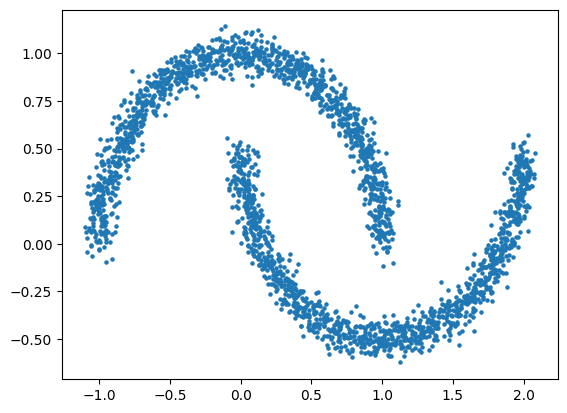

In [3]:
plt.scatter(x1,x2,s=5)
plt.show()

Finding optimum value

In [4]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x)
distances, indices = nbrs.kneighbors(x)

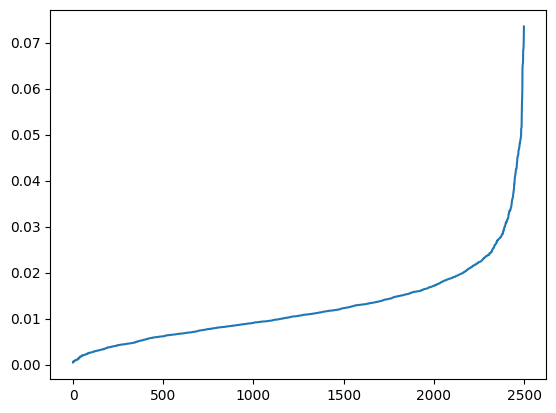

In [5]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

## Model Training

In [6]:
model = DBSCAN(eps = 0.050)
model.fit(x)

DBSCAN(eps=0.05)

## Prediction

In [11]:
y_pred = model.labels_.astype(np.int32)

Visualize clusters

Clusters:



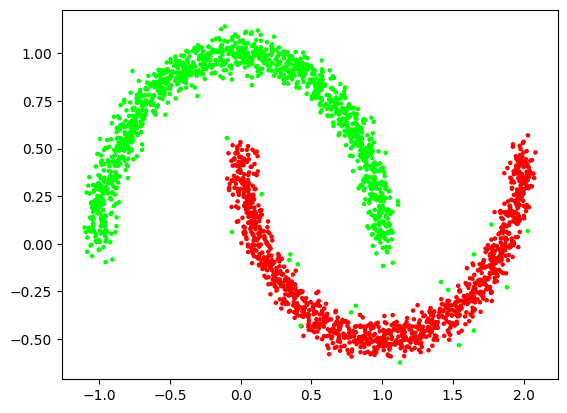

In [12]:
colors = np.array(['#ff0000','#00ff00'])
print("Clusters:\n")
plt.scatter(x1,x2,s=5,color = colors [y_pred])
plt.show()